# Mini-batch Stochastic Gradient Descent

The aim of this notebook is to implement mini batch SGD on the mnist dataset

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

In [3]:
# reading mnist data
mnist_data = input_data.read_data_sets('/datasets/ud730/mnist', one_hot=True, reshape=False)  

Extracting /datasets/ud730/mnist\train-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\train-labels-idx1-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-images-idx3-ubyte.gz
Extracting /datasets/ud730/mnist\t10k-labels-idx1-ubyte.gz


In [4]:
#set train and test data set
train_data = mnist_data.train.images.astype(np.float32)
test_data = mnist_data.test.images.astype(np.float32)
train_labels = mnist_data.train.labels.astype(np.float32)
test_labels = mnist_data.test.labels.astype(np.float32)

In [5]:
#Visualize shape of data
print(f"training dataset size: {train_data.shape}")
print(f"testing dataset size: {test_data.shape}")
print(f"labels trainig dataset size: {train_labels.shape}")
print(f"labels testing dataset size: {test_labels.shape}")

training dataset size: (55000, 28, 28, 1)
testing dataset size: (10000, 28, 28, 1)
labels trainig dataset size: (55000, 10)
labels testing dataset size: (10000, 10)


## visualize datasets

In [5]:
def visualize_data(dataset, square_size, figureSize=5):
    len_of_square = square_size
    f, axarr = plt.subplots(len_of_square, len_of_square, figsize=(figureSize,figureSize))
    j = 0
    
    for i in range(len_of_square*len_of_square):
        j = j%len_of_square 
        if i%len_of_square==0 and i!=0:
            j = j+1
        axarr[j,i%len_of_square].imshow(dataset[i].reshape(28,28), cmap='gray')

    plt.show();    


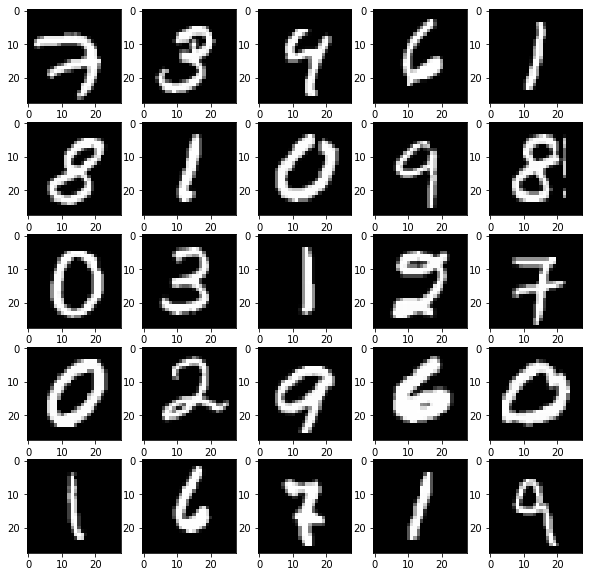

In [6]:
#training data
visualize_data(train_data, 5, figureSize=10)

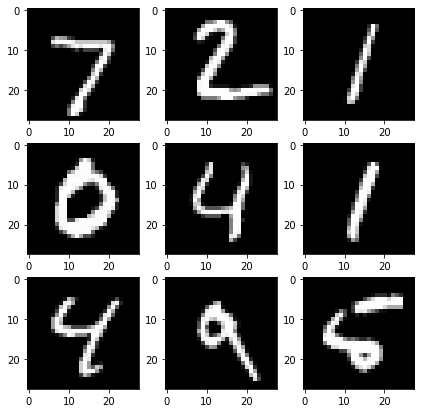

In [7]:
#testing data
visualize_data(test_data,3,7)

### get batches function 
This function will help us getting the batches for performing SGD
* Note: we don't need to shuffle the batches because mnist data already comes shuffled 

In [8]:
def get_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    # TODO: Implement batching
    output_batches = []
    
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        output_batches.append(batch)
        
    return output_batches

## Tensor flow section

### Setting-up the architecture of the nn which will have the below form:

![](figures/figure2.jpg)

In [6]:
train_data_shape = train_data.reshape(-1,784)
test_data_shape = test_data.reshape(-1,784)
no_features = train_data_shape.shape[1]
no_classes = train_labels.shape[1]

## tensors definition+
learning_rate_placeholder = tf.placeholder(tf.float32)
features = tf.placeholder(dtype=tf.float32, shape=[None, no_features])
labels = tf.placeholder(dtype=tf.float32, shape=[None, no_classes])
weights = tf.Variable(tf.truncated_normal([no_features, no_classes]),dtype=tf.float32)
bias = tf.Variable(tf.truncated_normal([no_classes]),dtype=tf.float32)
logits = tf.add(tf.matmul(features, weights), bias)
# cost function crossentropy
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
# optimizer set as gradien descent, but as we want minibatch SGD we will feed the data randomly and batches
learning_rate_placeholder = tf.placeholder(tf.float32)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate_placeholder).minimize(cost)
# Calculate accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Run Tensorflow session and train the nn

In [11]:
batch_size = 128
epochs = 200
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    for epoch_i in range(epochs):
        learning_rate = 1e-3 if epoch_i < 80 else 5e-4
        # get batches
        for batch_features, batch_labels in get_batches(batch_size, train_data_shape, train_labels):
            _, score, loss = sess.run([optimizer, accuracy, cost], feed_dict={features:batch_features, 
                                                                              labels:batch_labels, 
                                                                              learning_rate_placeholder:learning_rate})
        print(f" Training epoch: {epoch_i} - loss: {loss}, accuracy: {score}")
    test_accuracy = sess.run(accuracy, feed_dict={features:test_data_shape, labels:test_labels})
    print(f"\n\n *****Test Accuracy: {test_accuracy}*****")

 Training epoch: 0 - loss: 10.84433650970459, accuracy: 0.11363636702299118
 Training epoch: 1 - loss: 9.982397079467773, accuracy: 0.14772726595401764
 Training epoch: 2 - loss: 9.334877014160156, accuracy: 0.1818181872367859
 Training epoch: 3 - loss: 8.812315940856934, accuracy: 0.1818181872367859
 Training epoch: 4 - loss: 8.354653358459473, accuracy: 0.20454545319080353
 Training epoch: 5 - loss: 7.940855503082275, accuracy: 0.22727273404598236
 Training epoch: 6 - loss: 7.561100482940674, accuracy: 0.23863635957241058
 Training epoch: 7 - loss: 7.208675861358643, accuracy: 0.2613636255264282
 Training epoch: 8 - loss: 6.88070821762085, accuracy: 0.27272728085517883
 Training epoch: 9 - loss: 6.575801372528076, accuracy: 0.27272728085517883
 Training epoch: 10 - loss: 6.2927327156066895, accuracy: 0.27272728085517883
 Training epoch: 11 - loss: 6.030267238616943, accuracy: 0.28409090638160706
 Training epoch: 12 - loss: 5.787132740020752, accuracy: 0.28409090638160706
 Training ep

 Training epoch: 108 - loss: 1.7648887634277344, accuracy: 0.6590909361839294
 Training epoch: 109 - loss: 1.7597180604934692, accuracy: 0.6590909361839294
 Training epoch: 110 - loss: 1.7545963525772095, accuracy: 0.6590909361839294
 Training epoch: 111 - loss: 1.7495250701904297, accuracy: 0.6590909361839294
 Training epoch: 112 - loss: 1.744502305984497, accuracy: 0.6590909361839294
 Training epoch: 113 - loss: 1.7395271062850952, accuracy: 0.6590909361839294
 Training epoch: 114 - loss: 1.7345997095108032, accuracy: 0.6704545617103577
 Training epoch: 115 - loss: 1.7297192811965942, accuracy: 0.6704545617103577
 Training epoch: 116 - loss: 1.724885106086731, accuracy: 0.6818181872367859
 Training epoch: 117 - loss: 1.720096230506897, accuracy: 0.6818181872367859
 Training epoch: 118 - loss: 1.715351939201355, accuracy: 0.6818181872367859
 Training epoch: 119 - loss: 1.710652470588684, accuracy: 0.6818181872367859
 Training epoch: 120 - loss: 1.705996036529541, accuracy: 0.681818187

## As you can see accuracy tend to get stuck around epoch >170

What we can do is normalize the inputs since we currently home something like below:
![](figures/figure3.jpg)
However, this is badly conditioned since it will be more difficult for our model to reduce the cost. Therefore we will work on a function to get something like below:
![](figures/figure4.jpg)

In our images this will mean that we should condition the pixels so that we get normalized values that are between certain boundaries [a,b]. To understand how to do this pleas go [here](https://en.wikipedia.org/wiki/Normalization_(statistics)#Examples)

Implementing the Min-Max scaling function. The derivation of the formula is as follows:
![](figures/figure5.jpg)

Then the equation that we will implement is: 

$$\boxed{X'=a+{\frac {\left(X-X_{\min }\right)\left(b-a\right)}{X_{\max }-X_{\min }}}}$$ with the parameters:

$X_{\min }=0$ //min of our current pixels

$X_{\max }=255$ //max of our current pixels

$a=0.1$ //min scaled value desired

$b=0.9$ //max scaled value desired

In [12]:
def normalize_grayscale(image_data, a=0.1, b=0.9):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    grayscale_min = np.min(image_data)
    grayscale_max = np.max(image_data)
    return a + (((image_data - grayscale_min)*(b - a) )/(grayscale_max - grayscale_min))

In [13]:
norm_train_data = normalize_grayscale(train_data_shape)
norm_test_data = normalize_grayscale(test_data_shape)

In [14]:
batch_size = 128
epochs = 200
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    for epoch_i in range(epochs):
        learning_rate = 1e-3 #if epoch_i < 80 else 5e-4
        # get batches
        for batch_features, batch_labels in get_batches(batch_size, norm_train_data, train_labels):
            _, score, loss = sess.run([optimizer, accuracy, cost], feed_dict={features:batch_features, 
                                                                              labels:batch_labels, 
                                                                              learning_rate_placeholder:learning_rate})
        print(f" Training epoch: {epoch_i} - loss: {loss}, accuracy: {score}")
    test_accuracy = sess.run(accuracy, feed_dict={features:norm_test_data, labels:test_labels})
    print(f"\n\n *****Test Accuracy: {test_accuracy}*****")

 Training epoch: 0 - loss: 8.090409278869629, accuracy: 0.07954545319080353
 Training epoch: 1 - loss: 7.378990650177002, accuracy: 0.09090909361839294
 Training epoch: 2 - loss: 6.834489345550537, accuracy: 0.125
 Training epoch: 3 - loss: 6.412035942077637, accuracy: 0.17045454680919647
 Training epoch: 4 - loss: 6.076138496398926, accuracy: 0.17045454680919647
 Training epoch: 5 - loss: 5.8068037033081055, accuracy: 0.20454545319080353
 Training epoch: 6 - loss: 5.58450984954834, accuracy: 0.21590909361839294
 Training epoch: 7 - loss: 5.390984058380127, accuracy: 0.22727273404598236
 Training epoch: 8 - loss: 5.215121269226074, accuracy: 0.22727273404598236
 Training epoch: 9 - loss: 5.051466464996338, accuracy: 0.22727273404598236
 Training epoch: 10 - loss: 4.897456169128418, accuracy: 0.22727273404598236
 Training epoch: 11 - loss: 4.751826763153076, accuracy: 0.21590909361839294
 Training epoch: 12 - loss: 4.613865375518799, accuracy: 0.22727273404598236
 Training epoch: 13 - l

 Training epoch: 109 - loss: 1.4557398557662964, accuracy: 0.625
 Training epoch: 110 - loss: 1.4480037689208984, accuracy: 0.625
 Training epoch: 111 - loss: 1.4403706789016724, accuracy: 0.6363636255264282
 Training epoch: 112 - loss: 1.4328364133834839, accuracy: 0.6363636255264282
 Training epoch: 113 - loss: 1.425400972366333, accuracy: 0.6363636255264282
 Training epoch: 114 - loss: 1.418059229850769, accuracy: 0.6363636255264282
 Training epoch: 115 - loss: 1.4108116626739502, accuracy: 0.6363636255264282
 Training epoch: 116 - loss: 1.4036542177200317, accuracy: 0.6363636255264282
 Training epoch: 117 - loss: 1.396586537361145, accuracy: 0.6590909361839294
 Training epoch: 118 - loss: 1.3896052837371826, accuracy: 0.6704545617103577
 Training epoch: 119 - loss: 1.3827104568481445, accuracy: 0.6704545617103577
 Training epoch: 120 - loss: 1.3758999109268188, accuracy: 0.6704545617103577
 Training epoch: 121 - loss: 1.3691712617874146, accuracy: 0.6704545617103577
 Training epoch

**Observation:** we can see that the accuracy increases a little bit faster than without normalization

## Trying ADAGRAD optimizer

In [15]:
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate_placeholder).minimize(cost)
optimizer = tf.train.AdagradOptimizer(learning_rate=0.01).minimize(cost)
batch_size = 128
epochs = 200
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    for epoch_i in range(epochs):
        #learning_rate = 1e-3 #if epoch_i < 80 else 5e-4
        # get batches
        for batch_features, batch_labels in get_batches(batch_size, norm_train_data, train_labels):
            _, score, loss = sess.run([optimizer, accuracy, cost], feed_dict={features:batch_features, 
                                                                              labels:batch_labels})
        print(f" Training epoch: {epoch_i} - loss: {loss}, accuracy: {score}")
    test_accuracy = sess.run(accuracy, feed_dict={features:norm_test_data, labels:test_labels})
    print(f"\n\n *****Test Accuracy: {test_accuracy}*****")


 Training epoch: 0 - loss: 3.6356382369995117, accuracy: 0.3295454680919647
 Training epoch: 1 - loss: 2.6026272773742676, accuracy: 0.4545454680919647
 Training epoch: 2 - loss: 2.1075005531311035, accuracy: 0.5
 Training epoch: 3 - loss: 1.8105731010437012, accuracy: 0.5340909361839294
 Training epoch: 4 - loss: 1.6073112487792969, accuracy: 0.5568181872367859
 Training epoch: 5 - loss: 1.4579771757125854, accuracy: 0.6136363744735718
 Training epoch: 6 - loss: 1.3432120084762573, accuracy: 0.6818181872367859
 Training epoch: 7 - loss: 1.252350926399231, accuracy: 0.6818181872367859
 Training epoch: 8 - loss: 1.1787794828414917, accuracy: 0.6931818127632141
 Training epoch: 9 - loss: 1.1181049346923828, accuracy: 0.6931818127632141
 Training epoch: 10 - loss: 1.0672802925109863, accuracy: 0.7045454382896423
 Training epoch: 11 - loss: 1.0241230726242065, accuracy: 0.7045454382896423
 Training epoch: 12 - loss: 0.9870288372039795, accuracy: 0.7272727489471436
 Training epoch: 13 - los

 Training epoch: 107 - loss: 0.5079606771469116, accuracy: 0.8522727489471436
 Training epoch: 108 - loss: 0.5068378448486328, accuracy: 0.8522727489471436
 Training epoch: 109 - loss: 0.5057283043861389, accuracy: 0.8522727489471436
 Training epoch: 110 - loss: 0.5046325922012329, accuracy: 0.8522727489471436
 Training epoch: 111 - loss: 0.5035499334335327, accuracy: 0.8522727489471436
 Training epoch: 112 - loss: 0.5024800896644592, accuracy: 0.8522727489471436
 Training epoch: 113 - loss: 0.5014229416847229, accuracy: 0.8522727489471436
 Training epoch: 114 - loss: 0.5003781914710999, accuracy: 0.8522727489471436
 Training epoch: 115 - loss: 0.49934494495391846, accuracy: 0.8522727489471436
 Training epoch: 116 - loss: 0.49832451343536377, accuracy: 0.8522727489471436
 Training epoch: 117 - loss: 0.4973154067993164, accuracy: 0.8522727489471436
 Training epoch: 118 - loss: 0.4963182210922241, accuracy: 0.8522727489471436
 Training epoch: 119 - loss: 0.49533167481422424, accuracy: 0.

**Observation:** ADAGRAD manages to increase test accuracy up to 89% 

# NN with hidden layer

So far we used a linear neural network since we haven't use any hidden layer. By using a hidden layer with a non-linear activation function such as a RELU we can enhance the performance of our model since now we will be able to fit a non linear function. 

![](figures/figure6.jpg)


In [16]:
## Parameters
learning_rate = 0.0008
training_epochs = 40
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

## Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

## tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
## ******************************************************************
## Test model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [17]:
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist_data.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist_data.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display loss per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            train_score = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            print(f"Epoch: {epoch+1} - cost= {c}, training_accuracy: {train_score}")
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    print("Accuracy:", accuracy.eval({x: mnist_data.test.images, y: mnist_data.test.labels}))

Epoch: 1 - cost= 47.17692565917969, training_accuracy: 0.34375
Epoch: 2 - cost= 23.748462677001953, training_accuracy: 0.5
Epoch: 3 - cost= 20.165477752685547, training_accuracy: 0.5859375
Epoch: 4 - cost= 22.072261810302734, training_accuracy: 0.6328125
Epoch: 5 - cost= 18.01043701171875, training_accuracy: 0.6796875
Epoch: 6 - cost= 12.763065338134766, training_accuracy: 0.7265625
Epoch: 7 - cost= 18.481178283691406, training_accuracy: 0.6328125
Epoch: 8 - cost= 16.535354614257812, training_accuracy: 0.6796875
Epoch: 9 - cost= 10.348670959472656, training_accuracy: 0.734375
Epoch: 10 - cost= 10.897256851196289, training_accuracy: 0.78125
Epoch: 11 - cost= 6.198635101318359, training_accuracy: 0.828125
Epoch: 12 - cost= 9.42302131652832, training_accuracy: 0.7734375
Epoch: 13 - cost= 6.389941215515137, training_accuracy: 0.8125
Epoch: 14 - cost= 12.300577163696289, training_accuracy: 0.7578125
Epoch: 15 - cost= 10.338988304138184, training_accuracy: 0.75
Epoch: 16 - cost= 7.3780755996

**Observation:** We can clearly see that the model reaches a good accuracy faster

## Saving model

The model we have been using so far is simple, but more complex models could take hours to train. Therefore, it would be handy if we save our model's parameters to keep them training.

**Note:** Remember to always set the name of the tensors in your model, this way when you want to load a previous checkpoint you won't get any error. The reason is that, if you don't set the name of the tensors, Tensorflow sets them automatically with a name based on the order of the definition. 

> TensorFlow uses a string identifier for Tensors and Operations called name. If a name is not given, TensorFlow will create one automatically. TensorFlow will give the first node the name <Type>, and then give the name <Type>_<number> for the subsequent nodes. Let's see how this can affect loading a model with a different order of weights and bias:

In [18]:
## Parameters
learning_rate = 0.0008
training_epochs = 20
batch_size = 128  # Decrease batch size if you don't have enough memory
display_step = 1

n_input = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

n_hidden_layer = 256 # layer number of features

## Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

## tf Graph input
x = tf.placeholder("float", [None, 28, 28, 1])
y = tf.placeholder("float", [None, n_classes])

x_flat = tf.reshape(x, [-1, n_input])

# Hidden layer with RELU activation
layer_1 = tf.add(tf.matmul(x_flat, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)
# Output layer with linear activation
logits = tf.matmul(layer_1, weights['out']) + biases['out']

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# Saving model 
save_file = './train_model.ckpt'
saver = tf.train.Saver()

## ******************************************************************
## Test model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [19]:
# Launch the graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        total_batch = int(mnist_data.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist_data.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display loss per epoch step
        if epoch % display_step == 0:
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
            train_score = sess.run(accuracy, feed_dict={x: batch_x, y: batch_y})
            print(f"Epoch: {epoch+1} - cost= {c}, training_accuracy: {train_score}")
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    # Decrease test_size if you don't have enough memory
    print("Accuracy:", accuracy.eval({x: mnist_data.test.images, y: mnist_data.test.labels}))
    
    # Save the model
    saver.save(sess, save_file) # Saves the whole session
    print('Trained Model Saved.')

Epoch: 1 - cost= 39.823604583740234, training_accuracy: 0.390625
Epoch: 2 - cost= 34.43508529663086, training_accuracy: 0.4453125
Epoch: 3 - cost= 25.481521606445312, training_accuracy: 0.5390625
Epoch: 4 - cost= 23.194133758544922, training_accuracy: 0.5703125
Epoch: 5 - cost= 20.886192321777344, training_accuracy: 0.640625
Epoch: 6 - cost= 11.201963424682617, training_accuracy: 0.6953125
Epoch: 7 - cost= 13.850841522216797, training_accuracy: 0.6484375
Epoch: 8 - cost= 12.24250602722168, training_accuracy: 0.734375
Epoch: 9 - cost= 12.310770034790039, training_accuracy: 0.703125
Epoch: 10 - cost= 13.592023849487305, training_accuracy: 0.78125
Epoch: 11 - cost= 8.293068885803223, training_accuracy: 0.7890625
Epoch: 12 - cost= 13.679699897766113, training_accuracy: 0.7578125
Epoch: 13 - cost= 7.100655555725098, training_accuracy: 0.7890625
Epoch: 14 - cost= 9.64814281463623, training_accuracy: 0.796875
Epoch: 15 - cost= 8.416259765625, training_accuracy: 0.8125
Epoch: 16 - cost= 15.710

In [20]:
## Restore from saved model

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)

    test_accuracy = sess.run(
        accuracy,
        feed_dict={x: mnist_data.test.images, y: mnist_data.test.labels})

print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./train_model.ckpt
Test Accuracy: 0.8098000288009644
